<a href="https://colab.research.google.com/github/HughYau/Research-with-Python/blob/main/Green%20Multiplier/Figure_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

该 Notebook 文件旨在复现文中出现的图片结果。

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from adjustText import adjust_text
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.interpolate import InterpolatedUnivariateSpline,UnivariateSpline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [ ]:
predsale = np.load('predsale_new.npy')
predsale_wealth = np.load('predsale_wealth.npy')
predsale2 = np.load('predsale2_new.npy')

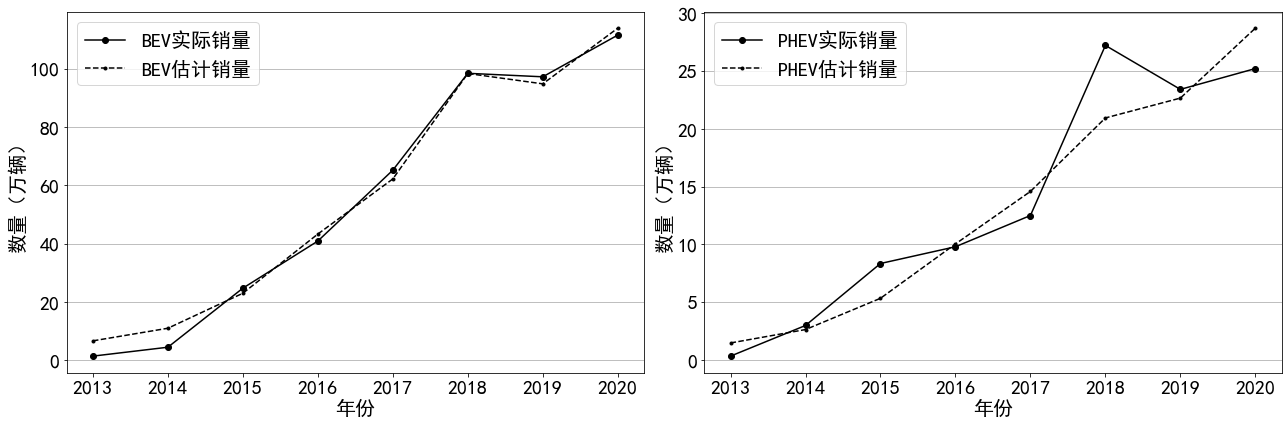

In [ ]:
x1 = [2013,2014,2015,2016,2017,2018,2019,2020]
Ty2 = predsale[0]

Ty3 = np.array([[1.453,0.347],#2013
            [4.5048,2.9952],
            [24.7482,8.3518],
            [40.9,9.8],
            [65.2,12.5],
            [98.4,27.2],
            [97.2,23.4],
            [111.5,25.2]])
y3 = Ty3.T
y2 = Ty2.T
y4 = [90,130,160,160]
fig, ax = plt.subplots(1,2, figsize = (18, 6))
ax[0].plot(x1, y3[0], color = 'k', label = 'BEV实际销量', linestyle = '-',marker='o')
ax[0].plot(x1, y2[0], color = 'k', label = 'BEV估计销量', linestyle = '--',marker='.')


ax[0].grid(axis='y')




ax[0].set_xlabel("年份",fontsize = 20)
ax[0].set_ylabel("数量（万辆）",fontsize = 20)
ax[0].tick_params(labelsize = 20)
ax[0].legend(fontsize = 20)

ax[1].plot(x1,y3[1], color = 'k', label = 'PHEV实际销量', linestyle = '-',marker='o')
ax[1].plot(x1,y2[1], color = 'k', label = 'PHEV估计销量', linestyle = '--',marker='.')


ax[1].set_xlabel("年份",fontsize = 20)
ax[1].set_ylabel("数量（万辆）",fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].legend(fontsize = 20)
ax[1].grid(axis='y')

plt.tight_layout() 
plt.savefig(r".\Final Figure\fit.png")
plt.show()

In [ ]:
policy = np.zeros((6,2,8))
for i in range(6):
    policy[i] = predsale[i].T
suball0 = [[0,4.83,3.5],
         [0,4.59,3.325],
         [0,4.35,3.15],
         [0,4.17,3],
         [0,3.33,2.4],
         [0,3.36,2.2],
         [0,2.15,1],
         [0,1.94,0.85],
         [0,1.55,0.68],
         [0,1.08,0.476]]
suball1 = [[0,4.83,3.5],
                 [0,4.83,3.5],
                 [0,4.83,3.5],
                 [0,4.83,3.5],
                 [0,4.83,3.5],
                 [0,4.83,3.5],
                [0,4.83,3.5],
                [0,4.83,3.5],
                 [0,4.83,3.5],
                 [0,4.83,3.5]]
suball2 = [[0,4.83,3.5],
                 [0,4.59,3.325],
                 [0,4.35,3.15],
                 [0,4.17,3],
                 [0,3.33,2.4],
                 [0,3.36,2.2],
                [0,3.36,2.2],
                 [0,3.36,2.2],
                 [0,3.36,2.2],
                 [0,3.36,2.2]]
VAT = [0.17,0.17,0.17,0.17,0.17,0.16,0.13,0.13,0.13,0.13]
price = np.array([104625.  , 103741.67, 103833.33, 105558.33, 105575.  , 105087.5 ,
        113700.  , 114675.  ])
x = np.linspace(2013,2020,8).astype('int')
policy_name = ['基准政策','政策一','政策二','政策三','政策四','无政策']
gs = np.zeros((6,8))#亿元
tax = np.zeros((6,8))
v = np.zeros((6,8))
c = np.zeros((6,8))
w = np.zeros((6,8))
for t in range(0,8):
    gs[0][t] = policy[0][0][t]*suball0[t][1]+policy[0][1][t]*suball0[t][2]
    gs[1][t] = policy[1][0][t]*suball1[t][1]+policy[1][1][t]*suball1[t][2]
    gs[2][t] = policy[2][0][t]*suball2[t][1]+policy[2][1][t]*suball2[t][2]
    gs[3][t] = policy[3][0][t]*suball0[t][1]+policy[3][1][t]*suball0[t][2]



    for i in range(6):
        v[i][t] = (policy[i][0][t]+policy[i][1][t])

    

    tax[0][t] = 0
    tax[1][t] = 0
    tax[2][t] = 0
    tax[3][t] = (policy[3][0][t]+policy[3][1][t])*price[t]*0.1/(10000*(1+VAT[t]))
    tax[4][t] = (policy[4][0][t]+policy[4][1][t])*price[t]*0.1/(10000*(1+VAT[t]))
    tax[5][t] = 0
    
cg1 = 55.3
cg2 = 28.1

for i in range(6):    
    w[i] = gs[i]+tax[i]
    c[i] = (policy[i][0]*cg1+policy[i][1]*cg2-(predsale2[i,:,0]*10e7+predsale2[i,:,1]*10e7)*209)*15/100

<IPython.core.display.Javascript object>


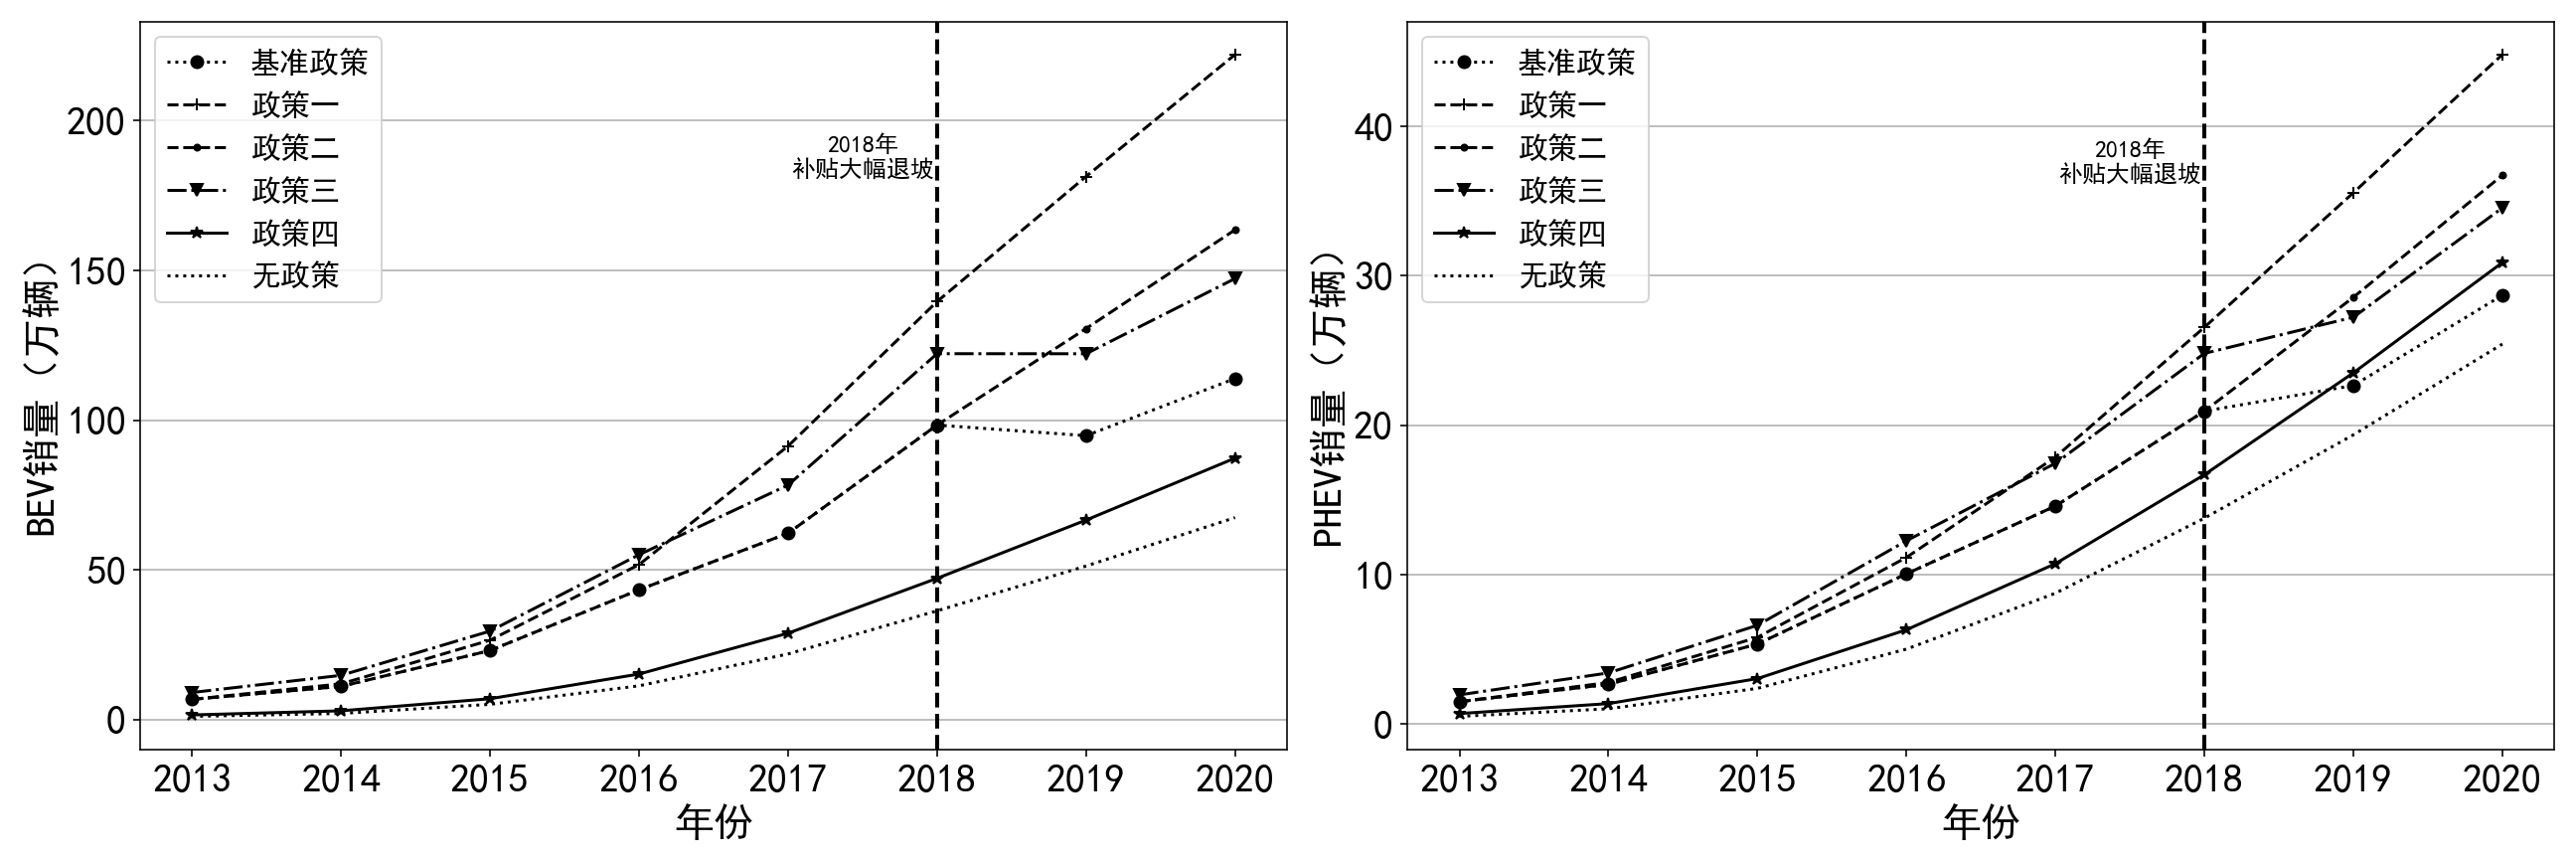

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (18, 6))
ax[0].plot(x, policy[0][0], color = 'k', label = '基准政策', linestyle = ':',marker='o')
ax[0].plot(x, policy[1][0], color = 'k', label = '政策一', linestyle = '--',marker='+')
ax[0].plot(x, policy[2][0], color = 'k', label = '政策二', linestyle = '--',marker='.')
ax[0].plot(x, policy[3][0], color = 'k', label = '政策三', linestyle = '-.',marker='v')
ax[0].plot(x, policy[4][0], color = 'k', label = '政策四', linestyle = '-',marker='*')
ax[0].plot(x, policy[5][0], color = 'k', label = '无政策', linestyle = ':')
ax[0].text(2017.5, 180, '2018年\n补贴大幅退坡', ha='center', va= 'bottom',fontsize=12)

ax[0].grid(axis='y')



ax[0].set_xlabel("年份",fontsize = 20)
ax[0].set_ylabel("BEV销量（万辆）",fontsize = 20)
ax[0].tick_params(labelsize = 20)
ax[0].axvline(x=2018, c="k", ls="--", lw=2)
ax[0].legend(fontsize = 15)
# ax[0].title.set_text('BEV',size = 15)

ax[1].plot(x, policy[0][1], color = 'k', label = '基准政策', linestyle = ':',marker='o')
ax[1].plot(x, policy[1][1], color = 'k', label = '政策一', linestyle = '--',marker='+')
ax[1].plot(x, policy[2][1], color = 'k', label = '政策二', linestyle = '--',marker='.')
ax[1].plot(x, policy[3][1], color = 'k', label = '政策三', linestyle = '-.',marker='v')
ax[1].plot(x, policy[4][1], color = 'k', label = '政策四', linestyle = '-',marker='*')
ax[1].plot(x, policy[5][1], color = 'k', label = '无政策', linestyle = ':')
ax[1].axvline(x=2018, c="k", ls="--", lw=2)
ax[1].text(2017.5, 36, '2018年\n补贴大幅退坡', ha='center', va= 'bottom',fontsize=12)



ax[1].set_xlabel("年份",fontsize = 20)
ax[1].set_ylabel("PHEV销量（万辆）",fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].legend(fontsize = 15)
ax[1].grid(axis='y')


plt.tight_layout() 
# plt.savefig(r".\Final Figure\ev sale.png")
plt.show()

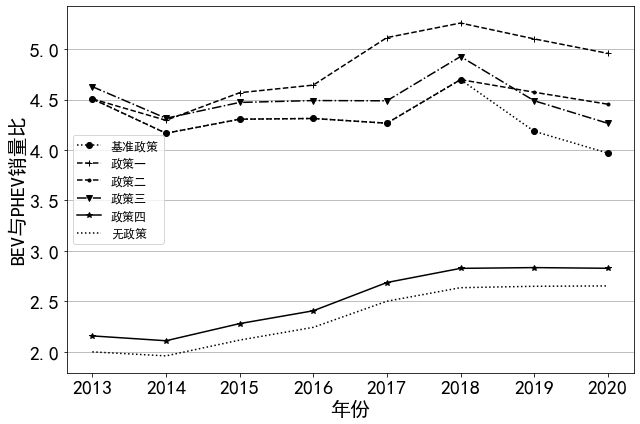

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(x, (policy[0][0]/policy[0][1]), color = 'k', label = '基准政策', linestyle = ':',marker='o')
plt.plot(x, (policy[1][0]/policy[1][1]), color = 'k', label = '政策一', linestyle = '--',marker='+')
plt.plot(x, (policy[2][0]/policy[2][1]), color = 'k', label = '政策二', linestyle = '--',marker='.')
plt.plot(x, (policy[3][0]/policy[3][1]), color = 'k', label = '政策三', linestyle = '-.',marker='v')
plt.plot(x, (policy[4][0]/policy[4][1]), color = 'k', label = '政策四', linestyle = '-',marker='*')
plt.plot(x, (policy[5][0]/policy[5][1]), color = 'k', label = '无政策', linestyle = ':')

plt.grid(axis='y')

plt.xlabel("年份",fontsize = 20)
plt.ylabel("BEV与PHEV销量比",fontsize = 20)
plt.tick_params(labelsize = 20)
plt.legend(fontsize = 12)

plt.tight_layout() 
# plt.savefig("sale ratio.pdf")
plt.show()

<IPython.core.display.Javascript object>


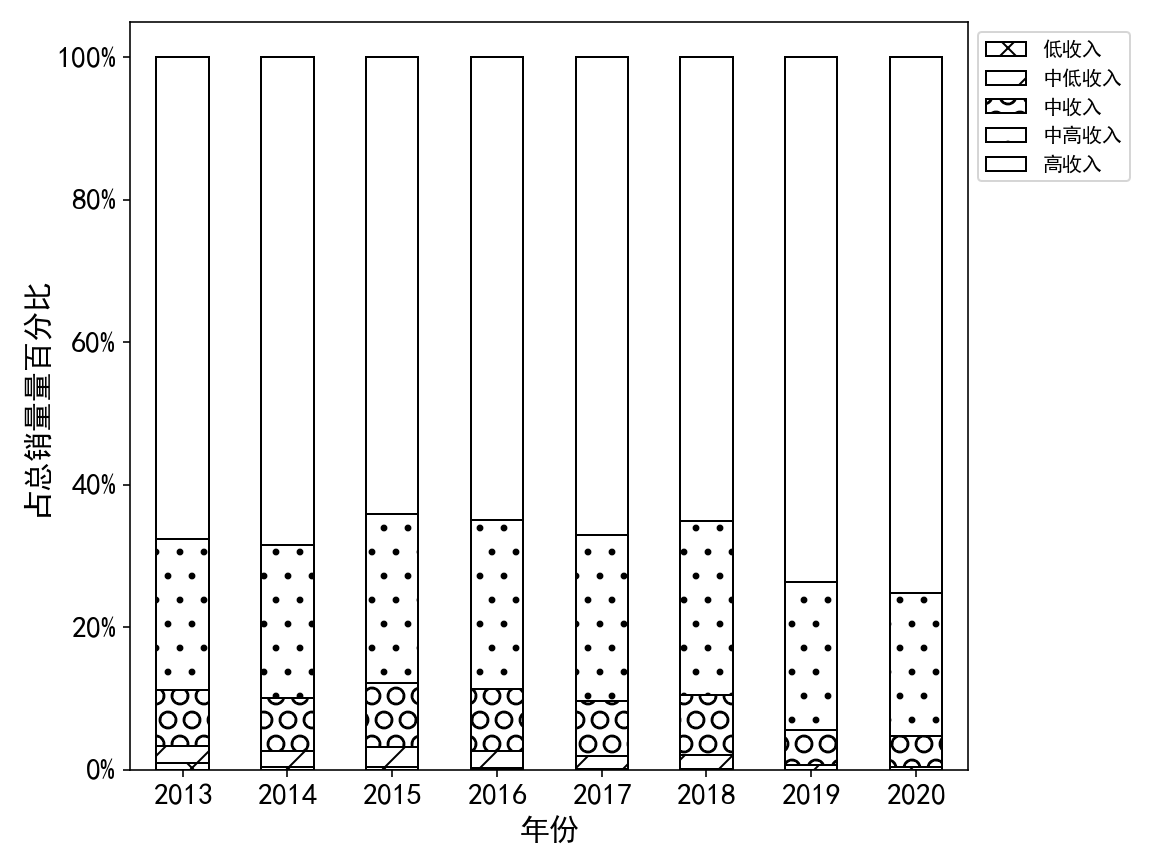

In [ ]:
predsale_w_sum = predsale_wealth[0,:,:,0]+predsale_wealth[0,:,:,1]
predsale_w_sum_pd = pd.DataFrame(predsale_w_sum.T,columns =['低收入','中低收入','中收入','中高收入','高收入'],index = np.linspace(2013,2020,8).astype('int'))
predsale_w_percent_pd =  predsale_w_sum_pd.div(predsale_w_sum_pd.sum(axis=1)/100, axis=0)

ax = predsale_w_percent_pd.plot.bar(
    stacked = True,
    figsize=(8, 6),rot = 0,color = 'w',edgecolor = 'k',legend = 'False')

bars = ax.patches
# patterns =('-', '+', 'x','/','//','O','o','\\','\\\\')
# hatches = [p for p in patterns for i in range(len(predsale_w_percent_pd))]
# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)

hatches = ''.join(h*len(predsale_w_percent_pd) for h in 'x/O.')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.tick_params(labelsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.legend(bbox_to_anchor=(1, 1), ncol=1)

ax.set_xlabel("年份",fontsize = 15)
ax.set_ylabel("占总销量量百分比",fontsize = 15)

plt.tight_layout() 
plt.savefig(r".\Final Figure\sale_wealth.png")

<IPython.core.display.Javascript object>


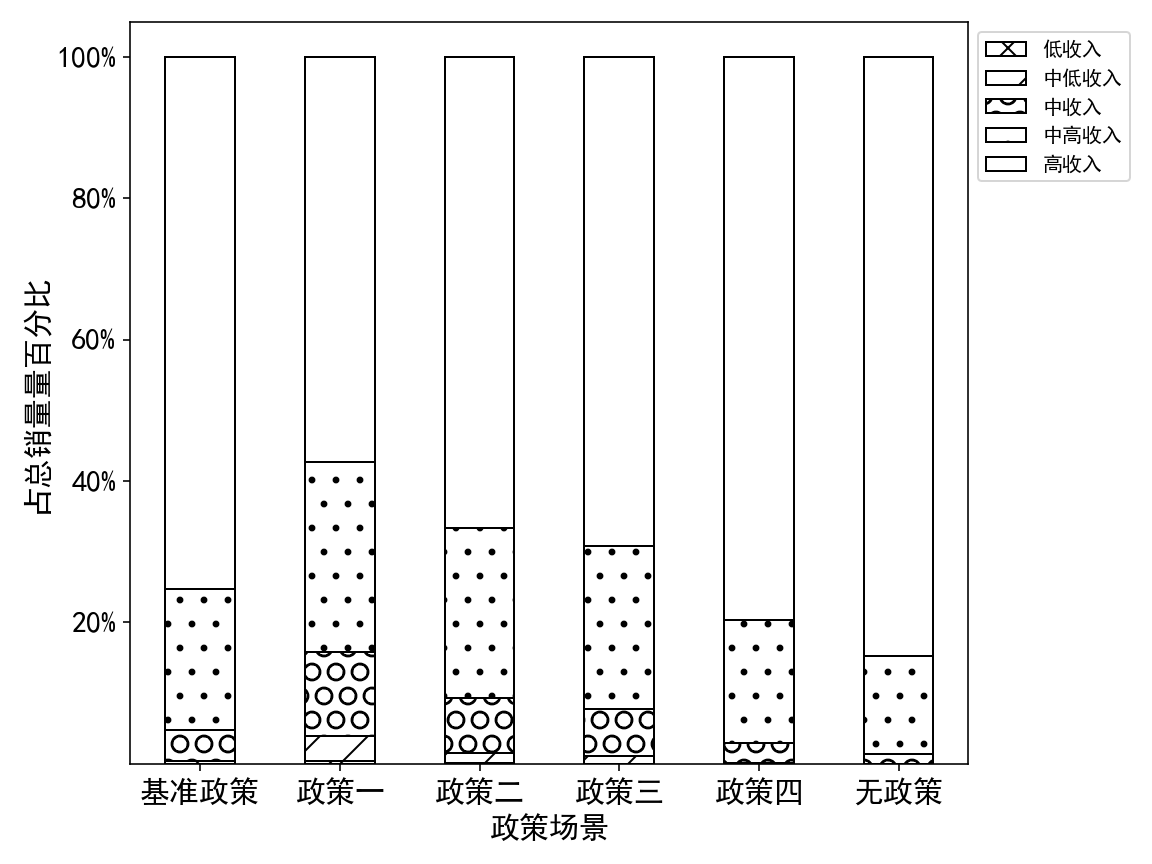

In [ ]:
predsale_w_sum = predsale_wealth[:,:,7,0]+predsale_wealth[:,:,7,1]
predsale_w_sum_pd = pd.DataFrame(predsale_w_sum,columns =['低收入','中低收入','中收入','中高收入','高收入'],index = policy_name)
predsale_w_percent_pd =  predsale_w_sum_pd.div(predsale_w_sum_pd.sum(axis=1)/100, axis=0)
# max_i=predsale_w_percent_pd.shape[0]#获取行数
# for i in range(max_i):
#     predsale_w_percent_pd.iloc[i]=predsale_w_percent_pd.iloc[i][::-1]#反转每行每列
# predsale_w_percent_pd.columns=predsale_w_percent_pd.columns[::-1]#反转列标签
ax = predsale_w_percent_pd.plot.bar(
    stacked = True,
    figsize=(8, 6),rot = 0,color = 'w',edgecolor = 'k',legend = 'False')
bars = ax.patches


hatches = ''.join(h*len(predsale_w_percent_pd) for h in 'x/O.')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.tick_params(labelsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.legend(bbox_to_anchor=(1, 1), ncol=1)
ax.set_xlabel("政策场景",fontsize = 15)
ax.set_ylabel("占总销量量百分比",fontsize = 15)

plt.tight_layout() 
plt.savefig(r".\Final Figure\policy_wealth.png")

In [ ]:
predsale_w_sum = predsale_wealth[:,:,7,0]+predsale_wealth[:,:,7,1]
predsale_w_sum_pd = pd.DataFrame(predsale_w_sum,columns =['低收入','中低收入','中收入','中高收入','高收入'],index = policy_name)

In [ ]:
predsale_w_sum_pd.to_csv('predsale_w_sum.csv',encoding = 'utf-8-sig')

In [ ]:
def policyplot(x,policy0,policy1,policy2,policy3,policy4,policy5):
    p1 = (policy1-policy0)/policy0
    p2 = (policy2-policy0)/policy0
    p4 = (policy4-policy0)/policy0
    p3 = (policy3-policy0)/policy0
    p5 = (policy5-policy0)/policy0
    p0 = (policy0-policy0)/policy0
    fig, ax = plt.subplots(1,2, figsize = (18, 6))
    ax[0].plot(x, policy0, color = 'k', label = '基准政策', linestyle = ':',marker='o')
    ax[0].plot(x, policy1, color = 'k', label = '政策一', linestyle = '--',marker='+')
    ax[0].plot(x, policy2, color = 'k', label = '政策二', linestyle = '--',marker='.')
    ax[0].plot(x, policy3, color = 'k', label = '政策三', linestyle = '-.',marker='v')
    ax[0].plot(x, policy4, color = 'k', label = '政策四', linestyle = '-',marker='*')
    ax[0].plot(x, policy5, color = 'k', label = '无政策', linestyle = ':')


    ax[0].grid(axis='y')
    


    ax[0].set_xlabel("年份",fontsize = 20)
    ax[0].set_ylabel("碳减排效益（万吨$CO_2e$）",fontsize = 20)
    ax[0].tick_params(labelsize = 20)
    ax[0].legend(fontsize = 10,loc='upper left')
    # ax[0].title.set_text('BEV',size = 15)

    ax[1].plot(x, p0, color = 'k', label = '基准政策', linestyle = ':',marker='o')
    ax[1].plot(x, p1, color = 'k', label = '政策一', linestyle = '--',marker='+')
    ax[1].plot(x, p2, color = 'k', label = '政策二', linestyle = '--',marker='.')
    ax[1].plot(x, p3, color = 'k', label = '政策三', linestyle = '-.',marker='v')
    ax[1].plot(x, p4, color = 'k', label = '政策四', linestyle = '-',marker='*')
    ax[1].plot(x, p5, color = 'k', label = '无政策', linestyle = ':')

    

    ax[1].set_xlabel("年份",fontsize = 20)
    ax[1].set_ylabel("各政策结果标准化（相对基准政策）",fontsize = 20)
    ax[1].tick_params(labelsize = 20)
    ax[1].legend(fontsize = 10,loc='upper left')
    ax[1].grid(axis='y')

    plt.tight_layout() 
#     plt.savefig("co2emmm.pdf")
    plt.show()

<IPython.core.display.Javascript object>


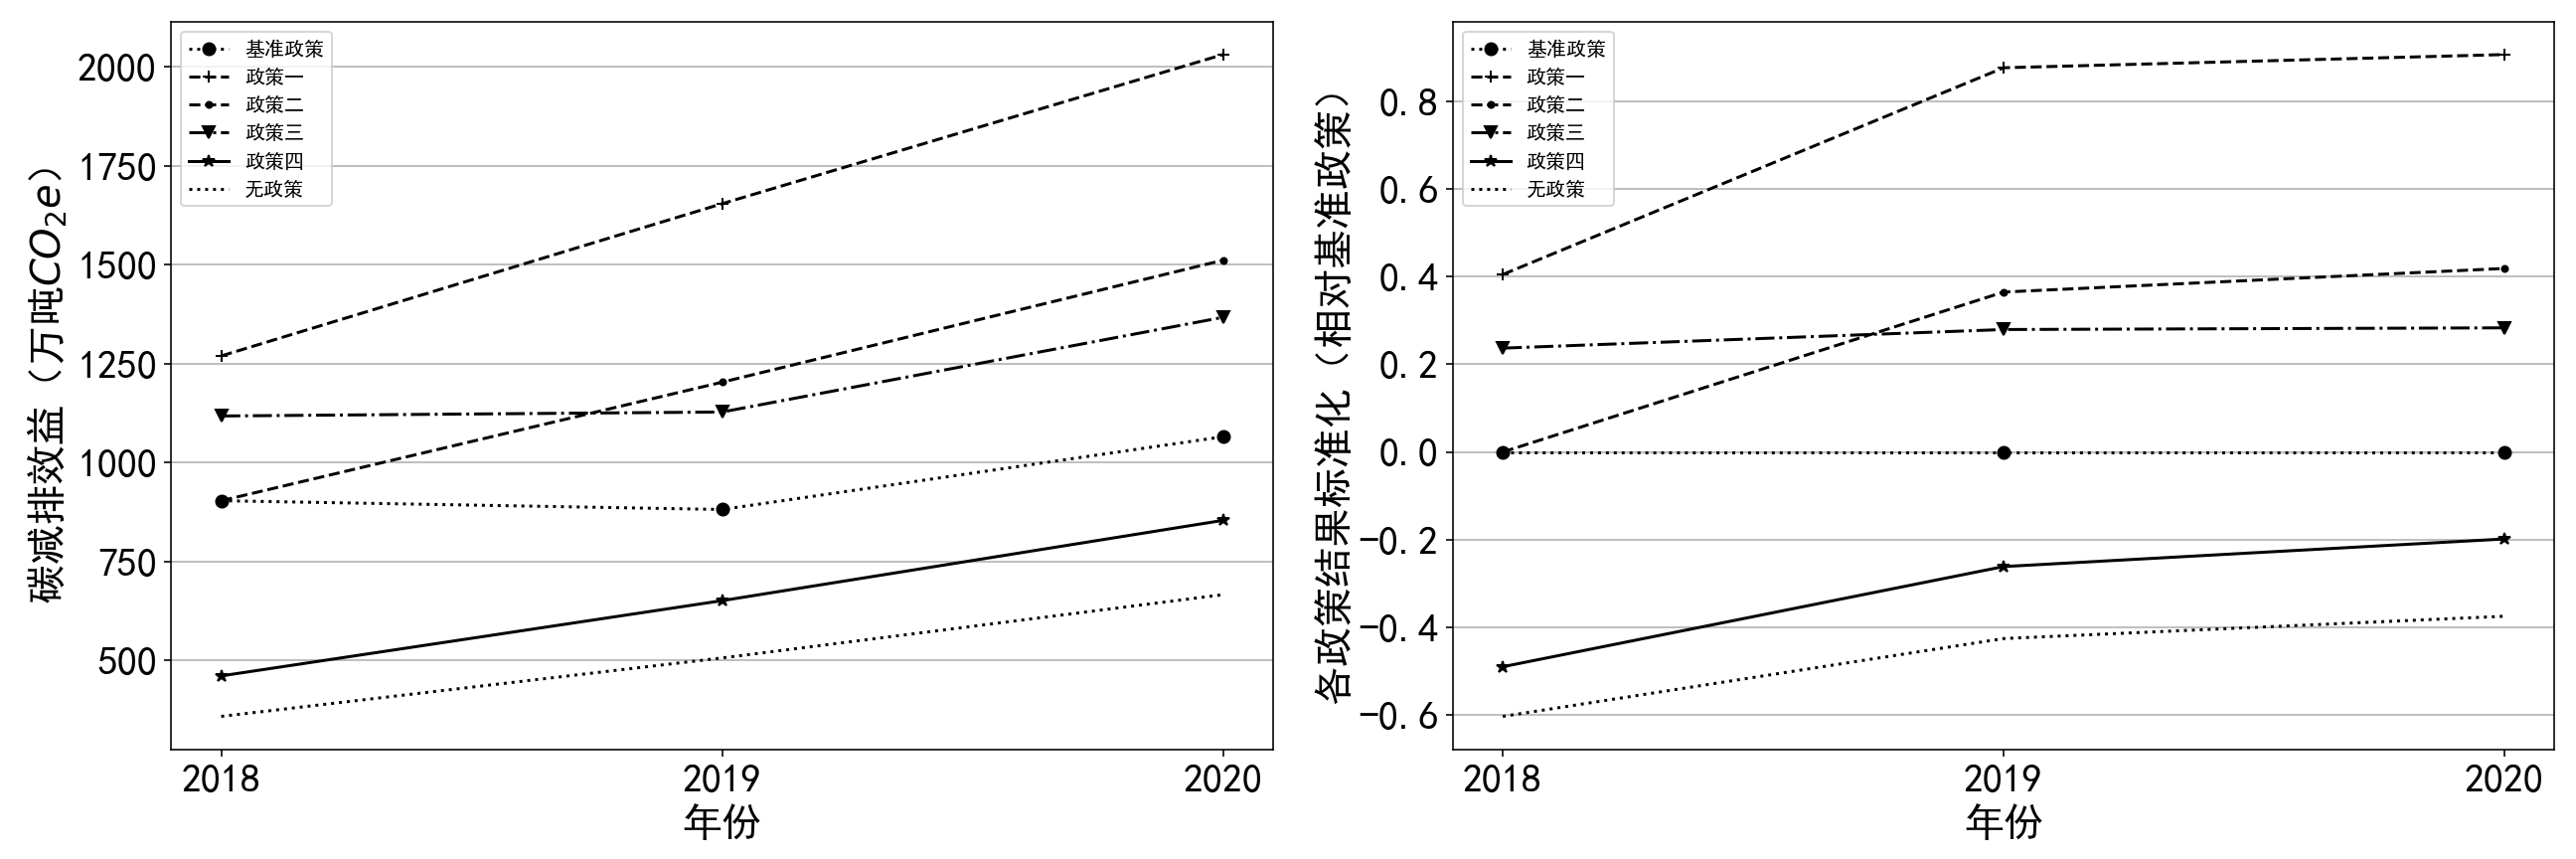

In [ ]:
policyplot(['2018','2019','2020'],c[0][5:8],c[1][5:8],c[2][5:8],c[3][5:8],c[4][5:8],c[5][5:8])

In [ ]:
deltagm = pd.DataFrame((c-c[5])/w)
# deltac = pd.DataFrame(c-c[5])

<ipython-input-5-2ab0032afe3e>:1: RuntimeWarning: invalid value encountered in true_divide
  deltagm = pd.DataFrame((c-c[5])/w)


In [ ]:
cpd = pd.DataFrame(c)
gspd = pd.DataFrame(gs)
taxpd = pd.DataFrame(tax)
sumpd = pd.DataFrame()
for i in range(5,8):
    sumpd1  = pd.concat([gspd[i],taxpd[i],cpd[i],deltagm[i]],axis = 1)
    print(sumpd1)
#     sumpd = pd.concat([sumpd,sumpd1])

            5           5           5         5
0  376.436459    0.000000  518.285448  0.842139
1  767.152281    0.000000  637.483858  0.568609
2  376.436459    0.000000  518.285448  0.842139
3  465.089981  133.154534  600.947913  0.668078
4    0.000000   57.799747  260.073572  1.017301
5    0.000000    0.000000  201.273809       NaN
             6           6           6         6
0   226.441026    0.000000  534.001201  1.062595
1  1000.546660    0.000000  882.999275  0.589291
2   501.526002    0.000000  713.077587  0.836829
3   289.868480  150.307005  673.445514  0.863427
4     0.000000   90.639698  378.873041  0.943150
5     0.000000    0.000000  293.386210       NaN
             7           7            7         7
0   245.301113    0.000000   662.877698  1.073182
1  1229.684108    0.000000  1145.704112  0.606724
2   630.389547    0.000000   927.391578  0.837207
3   315.088822  184.517732   844.587056  0.890625
4     0.000000  119.917746   513.802258  0.952130
5     0.000000    0.0

In [ ]:
pd.DataFrame(tax)

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9.760411,16.060202,32.028757,60.702892,86.376274,133.154534,150.307005,184.517732
4,1.937051,3.731733,8.809514,19.344899,35.651862,57.799747,90.639698,119.917746
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
pd.DataFrame(w)

,0,1,2,3,4,5,6,7
0,21.374777,33.773133,66.689530,120.223299,129.605887,213.378534,118.014760,129.250752
1,21.374777,39.136960,88.485532,175.154991,312.157056,493.674921,661.835185,823.352479
2,21.374777,33.773133,66.689530,120.223299,129.605887,213.378534,296.627393,379.590112
3,37.153719,58.660734,112.334984,202.511607,230.257812,369.893791,257.817709,291.923322
4,0.314008,0.793114,2.730871,6.590649,13.952320,25.371470,45.516728,60.814482
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
def drawcom(i,label1,label2,hatch1,fig,ax):
    width = 0.1
    name_list = ['2018','2019','2020']
    location=np.arange(len(name_list))
    time1=[deltac.iloc[0,5:8].array,deltagm.iloc[0,5:8].array]
    time2=[deltac.iloc[1,5:8].array,deltagm.iloc[1,5:8].array]
    time3=[deltac.iloc[2,5:8].array,deltagm.iloc[2,5:8].array]
    time4=[deltac.iloc[3,5:8].array,deltagm.iloc[3,5:8].array]
    time5=[deltac.iloc[4,5:8].array,deltagm.iloc[4,5:8].array]
    

    ax[i].bar(location, time1[i],tick_label = name_list,width = width,label="基准政策",alpha=0.8,color="w",edgecolor="k")
    for a,b in zip(location, time1[i]):
        ax[i].text(a, b+0.01, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)
    ax[i].bar(location+width, time2[i],tick_label = name_list,width = width,label="政策一",alpha=0.8,color="w",edgecolor="k",hatch="---")
    for a,b in zip(location+width, time2[i]):
        ax[i].text(a, b+0.01, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)
    ax[i].bar(location+width*2, time3[i],tick_label = name_list,width = width,label="政策二",alpha=0.8,color="w",edgecolor="k",hatch="/")
    for a,b in zip(location+width*2, time3[i]):
        ax[i].text(a, b+0.01, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)
    ax[i].bar(location+width*3, time4[i],tick_label = name_list,width = width,label="政策三",alpha=0.8,color="w",edgecolor="k",hatch="\\\\\\\\\\")
    for a,b in zip(location+width*3, time4[i]):
        ax[i].text(a, b+0.01, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)
    ax[i].bar(location+width*4, time5[i],tick_label = name_list,width = width,label=label1,alpha=0.8,color="w",edgecolor="k",hatch=hatch1)
    for a,b in zip(location+width*4, time5[i]):
        ax[i].text(a, b+0.01, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)
    ax[i].set_xticks(location+2*width)
    ax[i].set_xticklabels(name_list)
    ax[i].set_ylabel(label2,fontsize = 20)
    ax[i].set_xlabel('年份',fontsize = 20)
    ax[i].tick_params(labelsize = 20)
    ax[i].legend(fontsize = 12,loc='lower left')

<IPython.core.display.Javascript object>


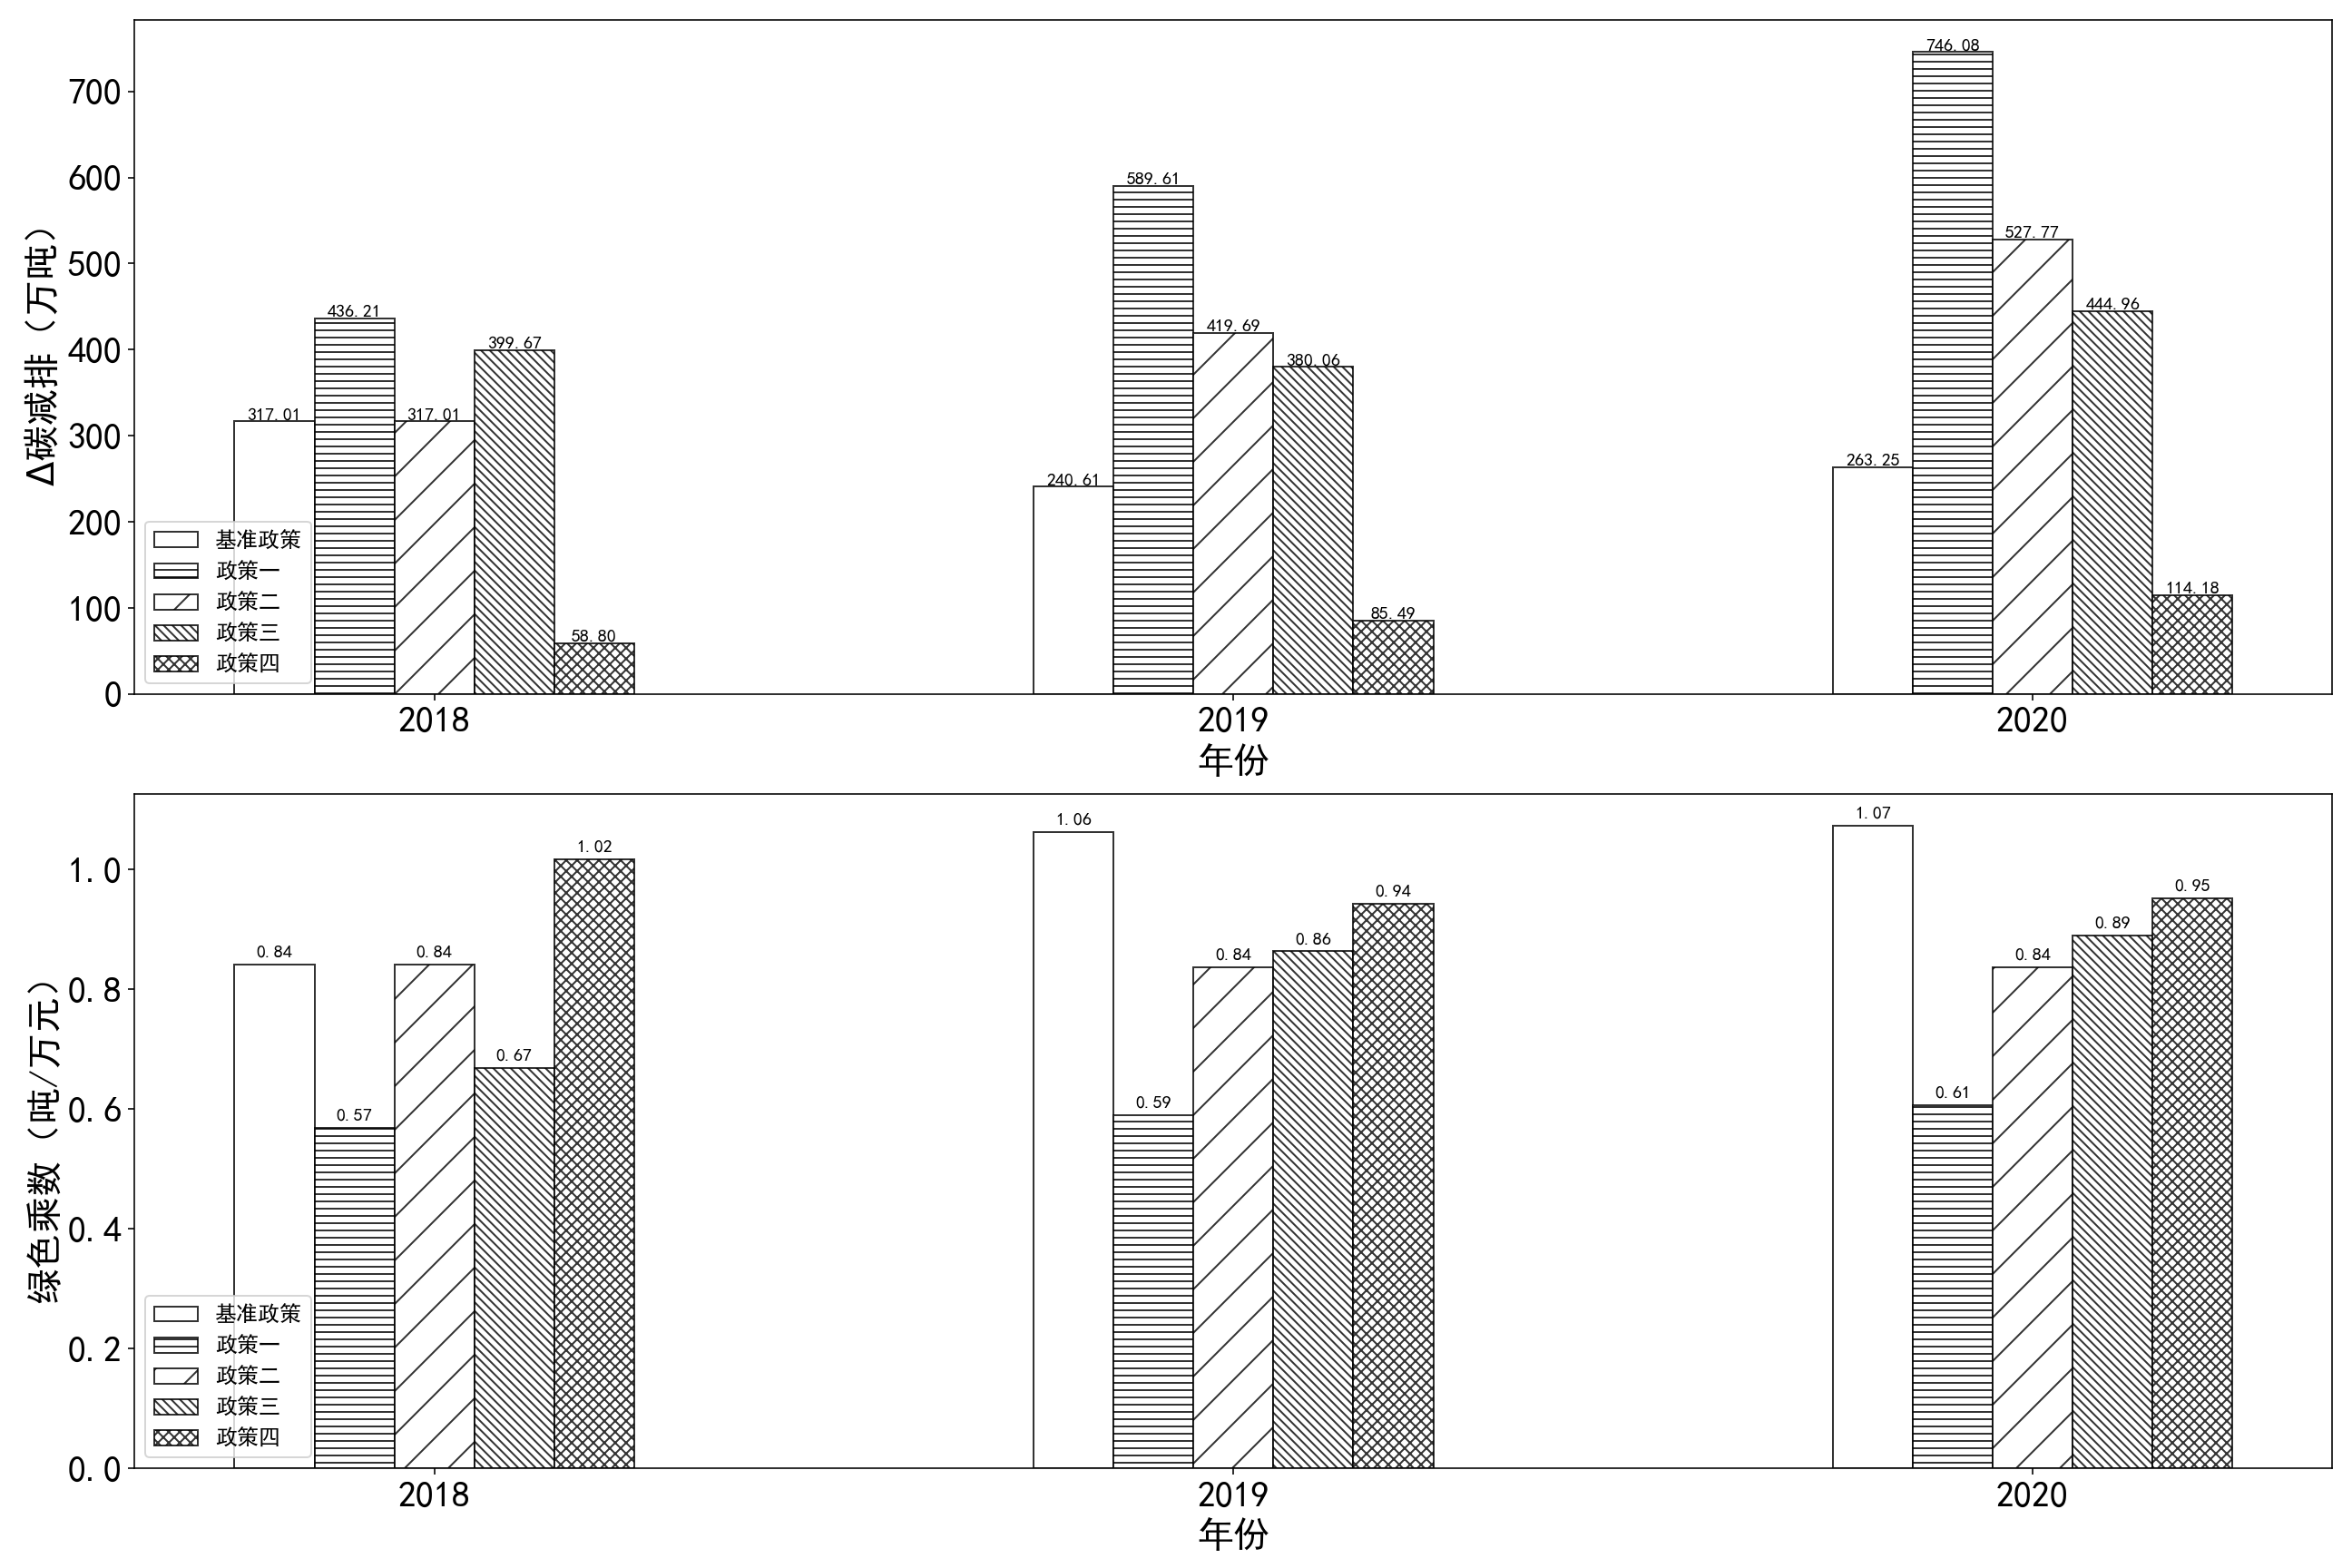

In [ ]:
width = 0.1
# location=np.arange(len(name_list))

fig, ax = plt.subplots(2, figsize = (18, 12))
# plt.figure(figsize=(9,6))
drawcom(0,'政策四','$\Delta$碳减排（万吨）','xxxx',fig,ax)
drawcom(1,'政策四','绿色乘数（吨/万元）','xxxx',fig,ax)
plt.tight_layout() 
# plt.savefig(r".\Final Figure\ce_new.png")
plt.show()


In [ ]:
carbon = np.load('optimal_carbon.npy')
w = np.load('optimal_w.npy')

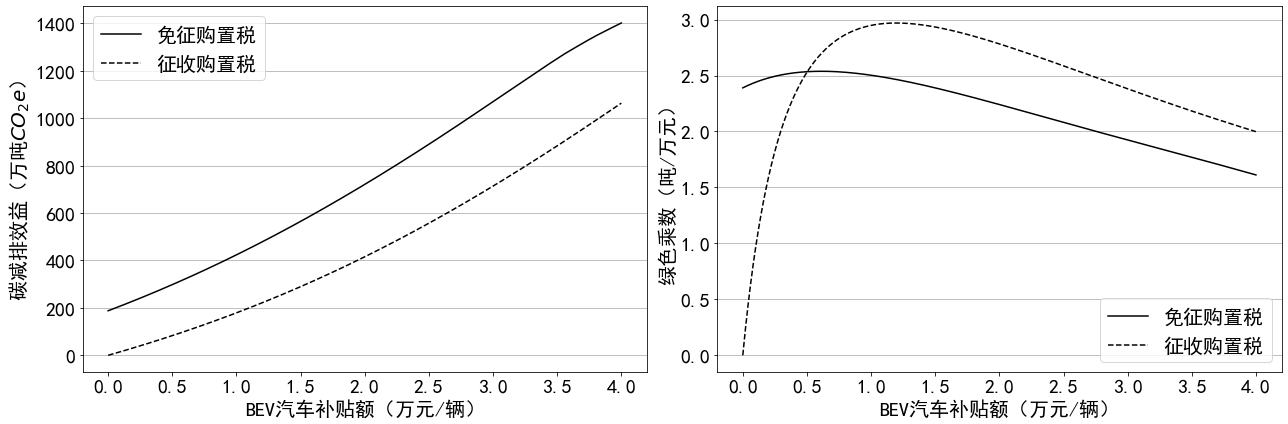

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (18, 6))
bev_tax = np.linspace(0,4,1000)
ax[0].plot(bev_tax, (carbon[0]-666.416089), color = 'k', label = '免征购置税', linestyle = '-')
ax[0].plot(bev_tax, (carbon[1]-666.416089), color = 'k', label = '征收购置税', linestyle = '--')


ax[0].grid(axis='y')






ax[0].set_xlabel("BEV汽车补贴额（万元/辆）",fontsize = 20)
ax[0].set_ylabel("碳减排效益（万吨$CO_2e$）",fontsize = 20)
ax[0].tick_params(labelsize = 20)
ax[0].legend(fontsize = 20)

ax[1].plot(bev_tax,(carbon[0]-666.416089)/(w[0]+234.468573), color = 'k', label = '免征购置税', linestyle = '-')
ax[1].plot(bev_tax,(carbon[1]-666.416089)/(w[1]+229.468573), color = 'k', label = '征收购置税', linestyle = '--')


ax[1].set_xlabel("BEV汽车补贴额（万元/辆）",fontsize = 20)
ax[1].set_ylabel("绿色乘数（吨/万元）",fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].legend(fontsize = 20)
ax[1].grid(axis='y')

plt.tight_layout() 
# plt.savefig("fit.pdf")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import mpld3 
carbon_3d = np.load('optimal_carbon_3d_new1.npy')
w_3d = np.load('optimal_w_3d_new2.npy')

In [ ]:
w_3d[1][0][0] = 0

In [ ]:
carbon_3d[0,5,2]+216.707552

805.2512687249555

<IPython.core.display.Javascript object>


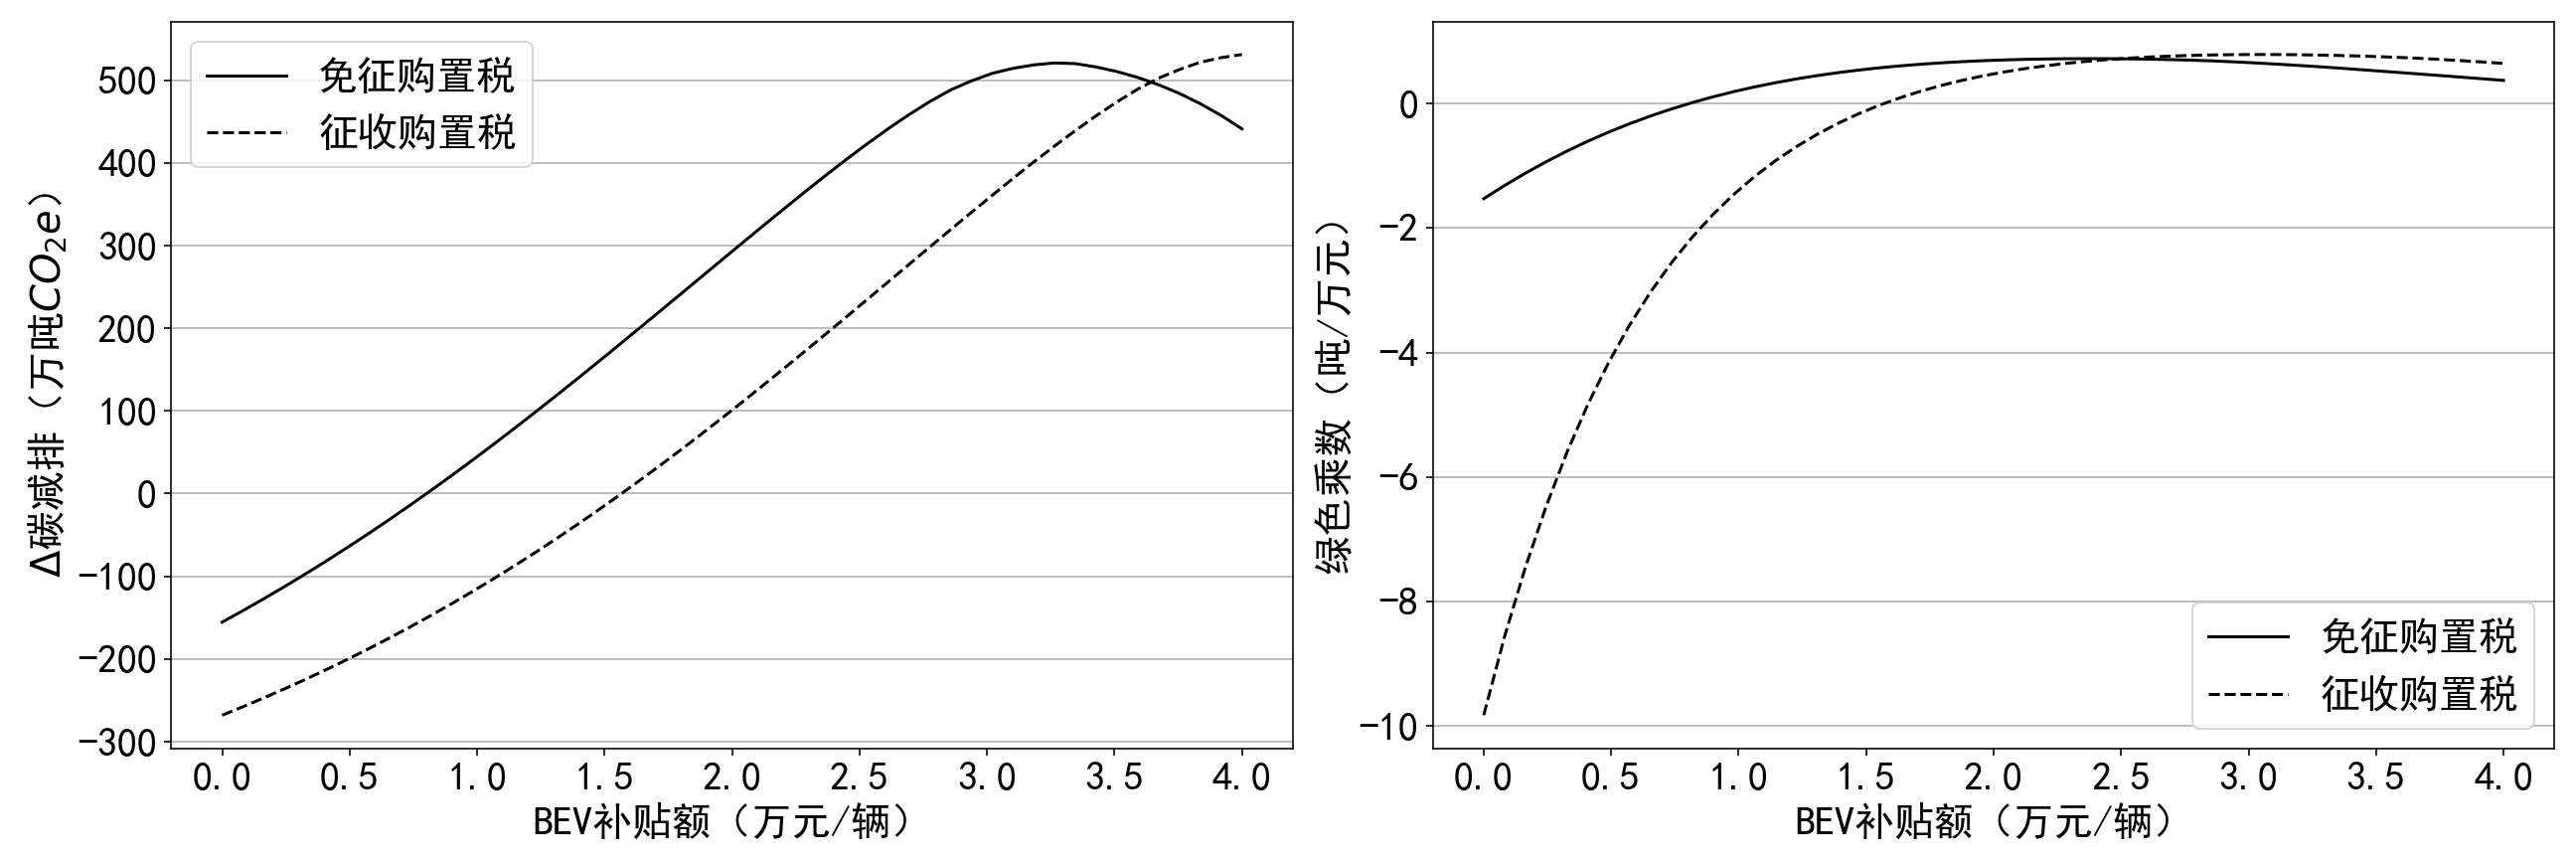

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (18, 6))
N = 50
bev_tax = np.linspace(0,4,N)
ax[0].plot(bev_tax, (carbon_3d[0,:,20]-666.416089), color = 'k', label = '免征购置税', linestyle = '-')
ax[0].plot(bev_tax, (carbon_3d[1,:,20]-666.416089), color = 'k', label = '征收购置税', linestyle = '--')


ax[0].grid(axis='y')






ax[0].set_xlabel("BEV补贴额（万元/辆）",fontsize = 20)
ax[0].set_ylabel("$\Delta$碳减排（万吨$CO_2e$）",fontsize = 20)
ax[0].tick_params(labelsize = 20)
ax[0].legend(fontsize = 20)

ax[1].plot(bev_tax,(carbon_3d[0,:,20]-666.416089)/(w_3d[0,:,20]+234.468573), color = 'k', label = '免征购置税', linestyle = '-')
ax[1].plot(bev_tax,(carbon_3d[1,:,20]-666.416089)/(w_3d[1,:,20]+229.468573), color = 'k', label = '征收购置税', linestyle = '--')

# for a,b in zip(x1,y3[1]):
#     ax[1].text(a, b-0.1, '%.2f' % b, ha='center', va= 'bottom',fontsize=12)
    

# for a,b in zip(x1,y2[1]):
#     ax[1].text(a, b+0.1, '%.2f' % b, ha='center', va= 'bottom',fontsize=12)

ax[1].set_xlabel("BEV补贴额（万元/辆）",fontsize = 20)
ax[1].set_ylabel("绿色乘数（吨/万元）",fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].legend(fontsize = 20)
ax[1].grid(axis='y')

plt.tight_layout() 
# plt.savefig(r".\Final Figure\2d.png")
plt.show()

In [ ]:
xx[20]

0.8163265306122448

<IPython.core.display.Javascript object>


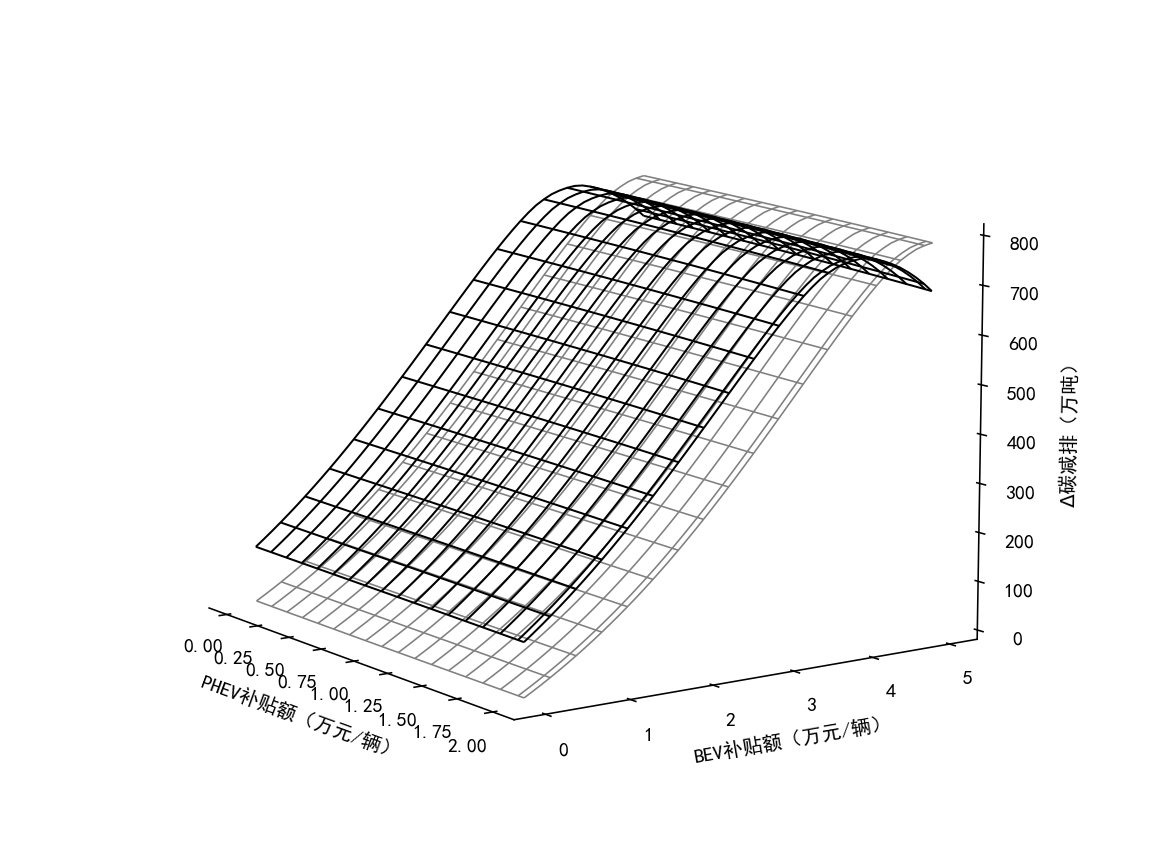

In [ ]:
%matplotlib notebook
mpld3.enable_notebook()
fig = plt.figure(figsize = (8,6))    
ax = Axes3D(fig)  
N = 50
xx = np.linspace(0,2,N)
yy =  np.linspace(0,5,N)
x, y = np.meshgrid(xx,yy)
z = x


ax.plot_wireframe(x,y, carbon_3d[0]-399.624943, rstride=3, cstride=3,colors = 'k',linewidths = 1)  
ax.plot_wireframe(x,y, carbon_3d[1]-399.624943, rstride=3, cstride=3,colors = 'gray',linewidths = 0.8) 
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.grid(b= None)


ax.set_ylabel('BEV补贴额（万元/辆）')
ax.set_xlabel('PHEV补贴额（万元/辆）')
ax.set_zlabel('$\Delta$碳减排（万吨）')

plt.show()

<IPython.core.display.Javascript object>


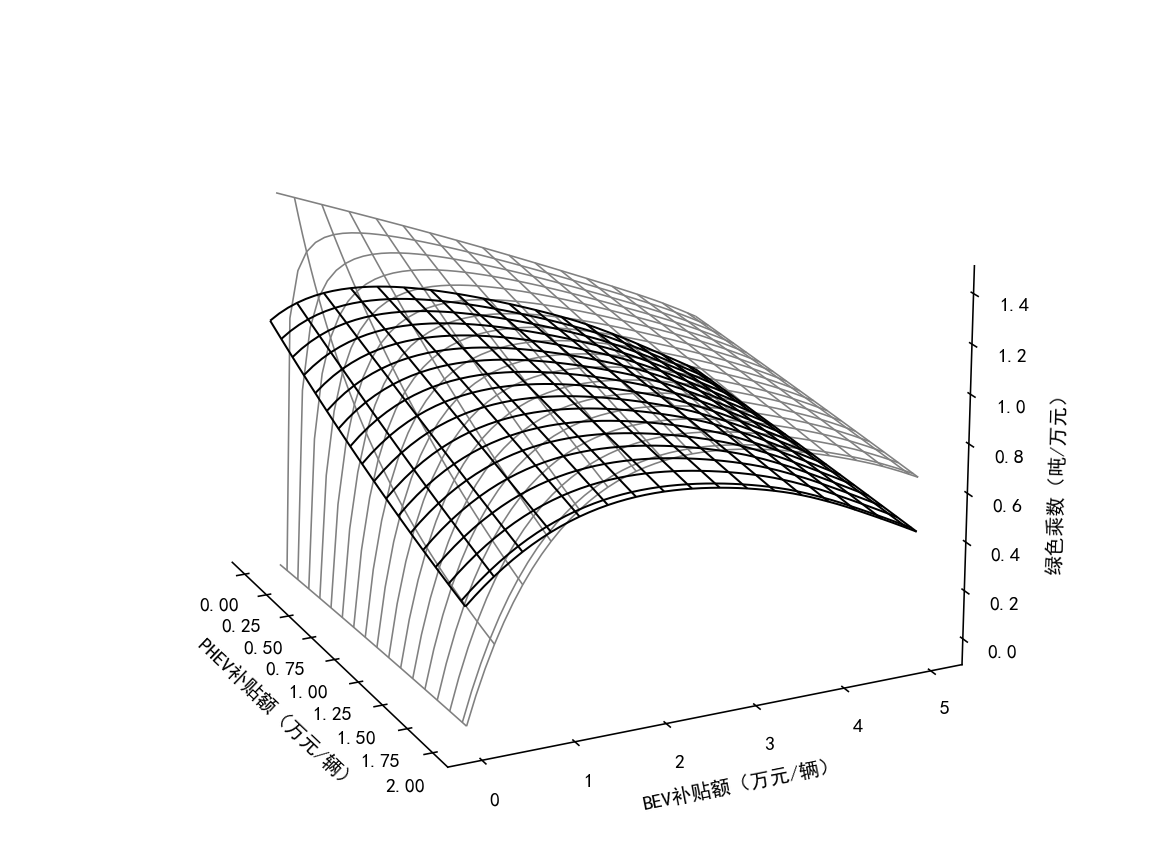

<ipython-input-23-71634e27a9e6>:11: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot_wireframe(x,y, (carbon_3d[1]-399.624943)/(w_3d[1]), rstride=3, cstride=3, color='gray',linewidths = 0.8)


In [ ]:
fig = plt.figure(figsize = (8,6))  
ax = Axes3D(fig)  
N = 50
xx = np.linspace(0,2,N)
yy =  np.linspace(0,5,N)
x, y = np.meshgrid(xx,yy)
z = x

# ax.plot_wireframe(x,y, (carbon_3d[0]-399.624943)/(w_3d[0]+220.707552), rstride=3, cstride=3, color='k',linewidths = 1)  
ax.plot_wireframe(x,y, (carbon_3d[0]-399.624943)/(w_3d[0]), rstride=3, cstride=3, color='k',linewidths = 1)  
ax.plot_wireframe(x,y, (carbon_3d[1]-399.624943)/(w_3d[1]), rstride=3, cstride=3, color='gray',linewidths = 0.8)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.grid(b= None)
ax.set_ylabel('BEV补贴额（万元/辆）')
ax.set_xlabel('PHEV补贴额（万元/辆）')
ax.set_zlabel("绿色乘数（吨/万元）")

plt.show()